In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load csv file into dataframe
steam_complete_data = pd.read_csv('Top 1000 Steam Games 2023/steam_complete_clean.csv')

In [3]:
# show first five rows of the dataframe
steam_complete_data.head()

,steam_appid,name,release_date,is_free,languages,developer,publisher,platforms,required_age,genre,positive_ratings,negative_ratings,recommendations,concurrent_users,owners,original_price,discount_percent,discounted_price
0,10,Counter-Strike,2000-11-01,False,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows,mac,linux",0.0,Action,216345,5530,137378,10775,10000000-20000000,9.99,0,9.99
1,20,Team Fortress Classic,1999-04-01,False,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows,mac,linux",0.0,Action,6472,990,5474,77,5000000-10000000,4.99,0,4.99
2,30,Day of Defeat,2003-05-01,False,"English, French, German, Italian, Spanish - Spain",Valve,Valve,"windows,mac,linux",0.0,Action,5686,634,3694,89,5000000-10000000,4.99,0,4.99
3,40,Deathmatch Classic,2001-06-01,False,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows,mac,linux",0.0,Action,2242,490,1924,8,5000000-10000000,4.99,0,4.99
4,50,Half-Life: Opposing Force,1999-11-01,False,"English, French, German, Korean",Gearbox Software,Valve,"windows,mac,linux",0.0,Action,17468,890,15478,162,2000000-5000000,4.99,0,4.99


In [4]:
# check the count of unique values in discount_percent column
steam_complete_data['discount_percent'].value_counts()

discount_percent
0     826
75     41
80     17
85     15
70     15
50     12
60     10
90      8
30      3
67      3
65      3
86      2
35      2
40      2
66      2
77      1
83      1
84      1
87      1
25      1
Name: count, dtype: int64

In [5]:
# show the information about dataframe
steam_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   steam_appid       966 non-null    int64  
 1   name              966 non-null    object 
 2   release_date      966 non-null    object 
 3   is_free           966 non-null    bool   
 4   languages         966 non-null    object 
 5   developer         966 non-null    object 
 6   publisher         966 non-null    object 
 7   platforms         966 non-null    object 
 8   required_age      966 non-null    float64
 9   genre             966 non-null    object 
 10  positive_ratings  966 non-null    int64  
 11  negative_ratings  966 non-null    int64  
 12  recommendations   966 non-null    int64  
 13  concurrent_users  966 non-null    int64  
 14  owners            966 non-null    object 
 15  original_price    966 non-null    float64
 16  discount_percent  966 non-null    int64  
 1

In [6]:
# change data type of required_age column as int
steam_complete_data['required_age'] = steam_complete_data['required_age'].astype('int64')

In [7]:
# change data type of release_date column as datetime
steam_complete_data['release_date'] = steam_complete_data['release_date'].astype('datetime64[ns]')

In [8]:
# create a new column year in datframe by extracting year from release_date
steam_complete_data['year_released'] = steam_complete_data['release_date'].apply(lambda x: x.year)

In [9]:
# check information about dataframe after changing column data type
steam_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   steam_appid       966 non-null    int64         
 1   name              966 non-null    object        
 2   release_date      966 non-null    datetime64[ns]
 3   is_free           966 non-null    bool          
 4   languages         966 non-null    object        
 5   developer         966 non-null    object        
 6   publisher         966 non-null    object        
 7   platforms         966 non-null    object        
 8   required_age      966 non-null    int64         
 9   genre             966 non-null    object        
 10  positive_ratings  966 non-null    int64         
 11  negative_ratings  966 non-null    int64         
 12  recommendations   966 non-null    int64         
 13  concurrent_users  966 non-null    int64         
 14  owners            966 non-

In [10]:
steam_complete_data.head()

,steam_appid,name,release_date,is_free,languages,developer,publisher,platforms,required_age,genre,positive_ratings,negative_ratings,recommendations,concurrent_users,owners,original_price,discount_percent,discounted_price,year_released
0,10,Counter-Strike,2000-11-01,False,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows,mac,linux",0,Action,216345,5530,137378,10775,10000000-20000000,9.99,0,9.99,2000
1,20,Team Fortress Classic,1999-04-01,False,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows,mac,linux",0,Action,6472,990,5474,77,5000000-10000000,4.99,0,4.99,1999
2,30,Day of Defeat,2003-05-01,False,"English, French, German, Italian, Spanish - Spain",Valve,Valve,"windows,mac,linux",0,Action,5686,634,3694,89,5000000-10000000,4.99,0,4.99,2003
3,40,Deathmatch Classic,2001-06-01,False,"English, French, German, Italian, Spanish - Sp...",Valve,Valve,"windows,mac,linux",0,Action,2242,490,1924,8,5000000-10000000,4.99,0,4.99,2001
4,50,Half-Life: Opposing Force,1999-11-01,False,"English, French, German, Korean",Gearbox Software,Valve,"windows,mac,linux",0,Action,17468,890,15478,162,2000000-5000000,4.99,0,4.99,1999


# Price Analysis

Text(0.5, 1.0, 'Distribution of Original Game Prices')

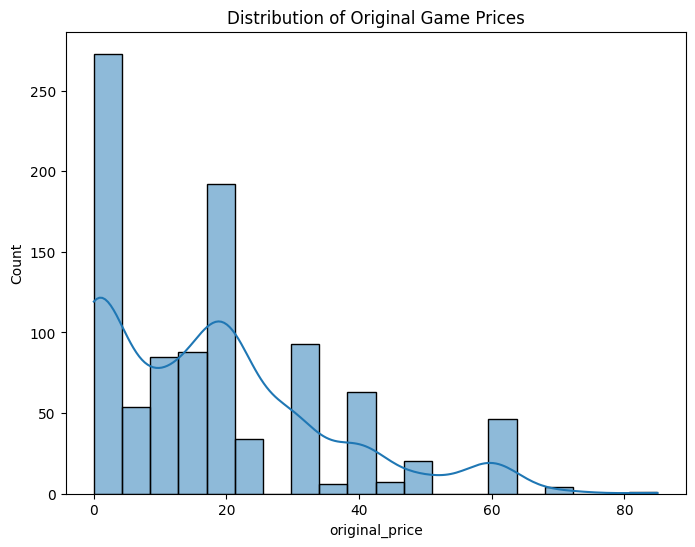

In [11]:
# Create a histogram to visualize the distribution of original game prices

plt.figure(figsize=(8,6))

sns.histplot(steam_complete_data, x = 'original_price', bins = 20, kde = True)

plt.title("Distribution of Original Game Prices")

# Analysis of number of games in Top 1000 in 2023 according to release date

Text(0.5, 1.0, 'Games in Top 1000 in 2023 according to release date')

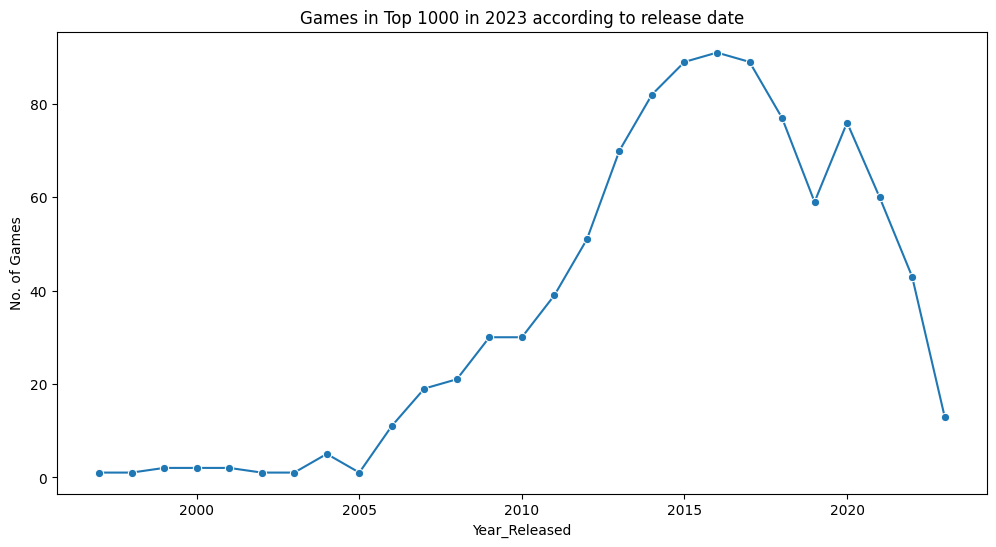

In [12]:
# Group the 'steam_complete_data' DataFrame by the 'year_released' column and count the number of games in each year.
game_released_year = steam_complete_data.groupby('year_released').size().reset_index()

# Rename columns
game_released_year.columns = ['Year_Released', 'No. of Games']

plt.figure(figsize=(12,6))

# Create a line plot to visualize the number of games released each year.
sns.lineplot(game_released_year, x = 'Year_Released', y = 'No. of Games', marker = 'o')

plt.title("Games in Top 1000 in 2023 according to release date")

* **It can be observed that 91 games released in 2016 has made it to top 1000 on Steam in 2023, followed by 83 games released in 2015 and 2017 respectively that made it to Top 1000.**

# Games with most concurrent players among top 1000 steam games in 2023

Text(0.5, 1.0, 'Games with most concurrent players among top 1000 steam games')

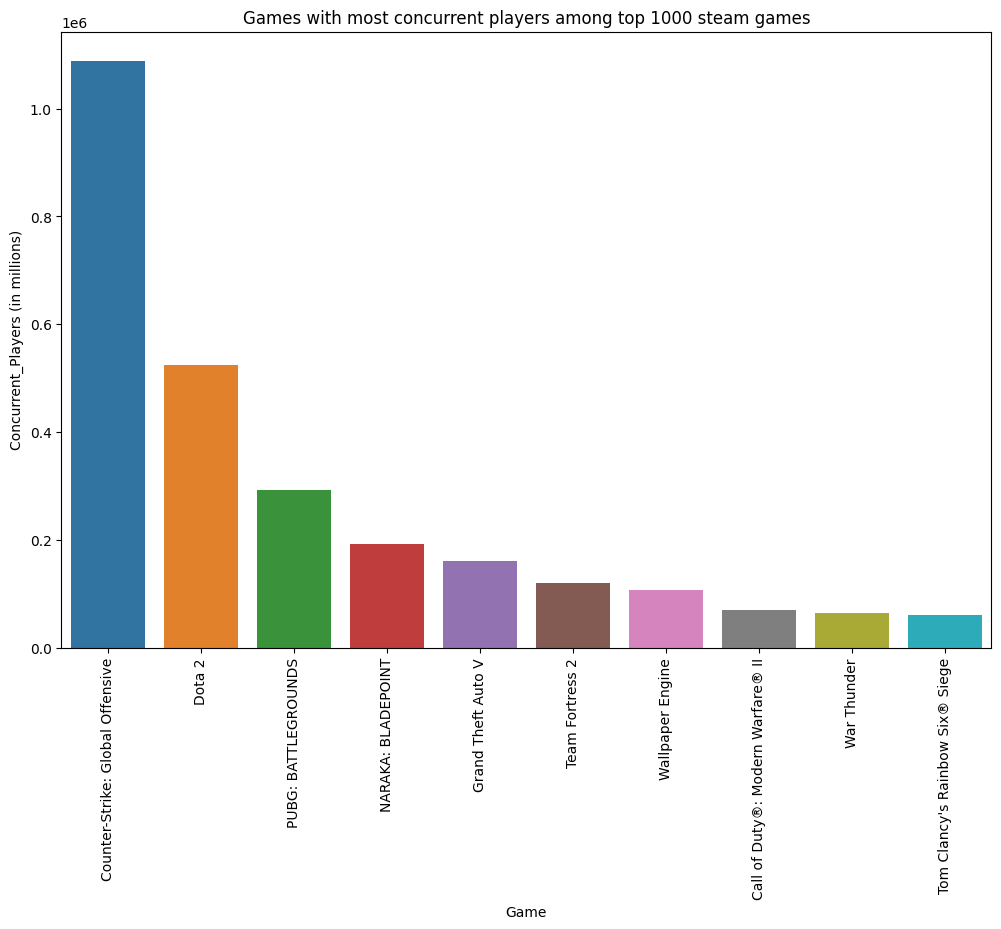

In [13]:
# Select the top 10 games with the highest concurrent user counts from the 'steam_complete_data' DataFrame.
top_concurrent = steam_complete_data[['name', 'concurrent_users']].sort_values(by = 'concurrent_users', ascending = False).head(10)

# Rename columns
top_concurrent.columns = ['Game', 'Concurrent_Players (in millions)']

plt.figure(figsize=(12,8))

# Create a bar plot to visualize the top games by concurrent players.
sns.barplot(top_concurrent, x = 'Game', y = 'Concurrent_Players (in millions)')

plt.xticks(rotation = 90)

plt.title("Games with most concurrent players among top 1000 steam games")

# Games with most recommendations among top 1000 games in 2023

Text(0.5, 1.0, 'Games with most recommendations among top 1000 games')

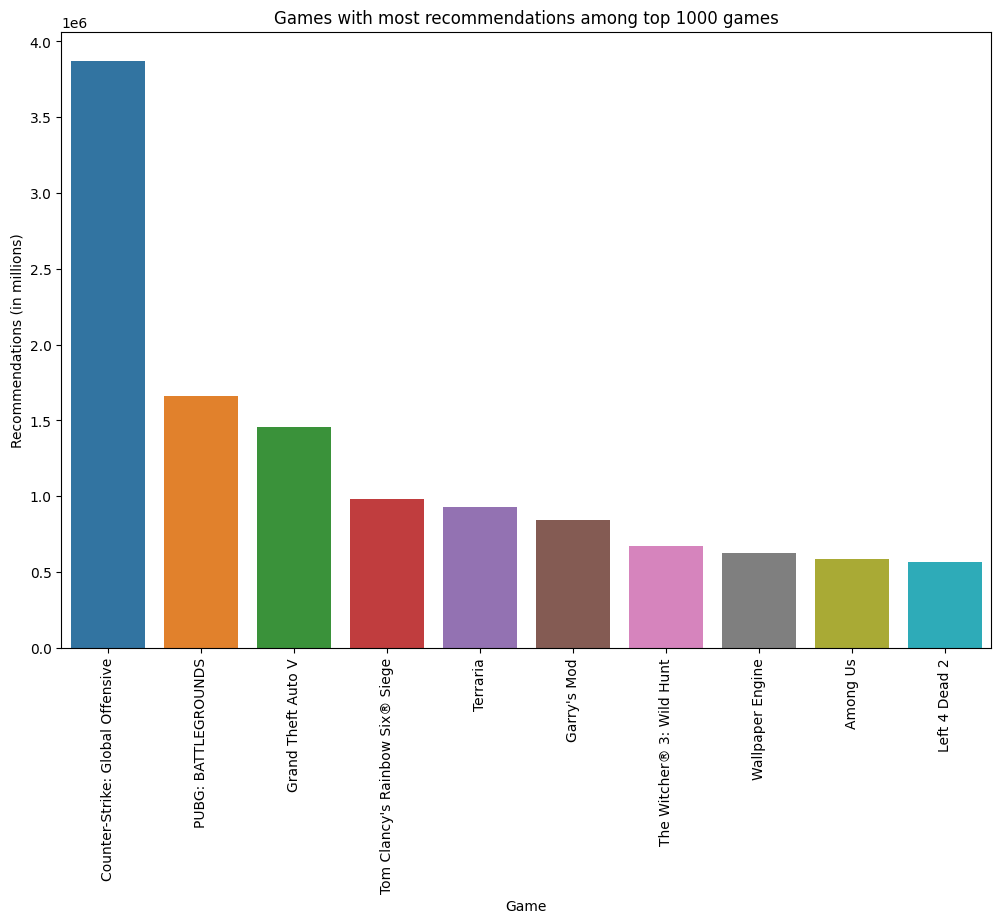

In [14]:
# Select the top 10 games with the most recomendations from the 'steam_complete_data' DataFrame.
top_recommendations = steam_complete_data[['name', 'recommendations']].sort_values(by = 'recommendations', ascending = False).head(10)

# Rename columns
top_recommendations.columns = ['Game', 'Recommendations (in millions)']

plt.figure(figsize=(12,8))

# Create a bar plot to visualize the most recommended games.
sns.barplot(top_recommendations, x = 'Game', y = 'Recommendations (in millions)')

plt.xticks(rotation = 90)

plt.title("Games with most recommendations among top 1000 games")

# Games with most positive ratings among top 1000 games in 2023

Text(0.5, 1.0, 'Games with most positive ratings among top 1000 games')

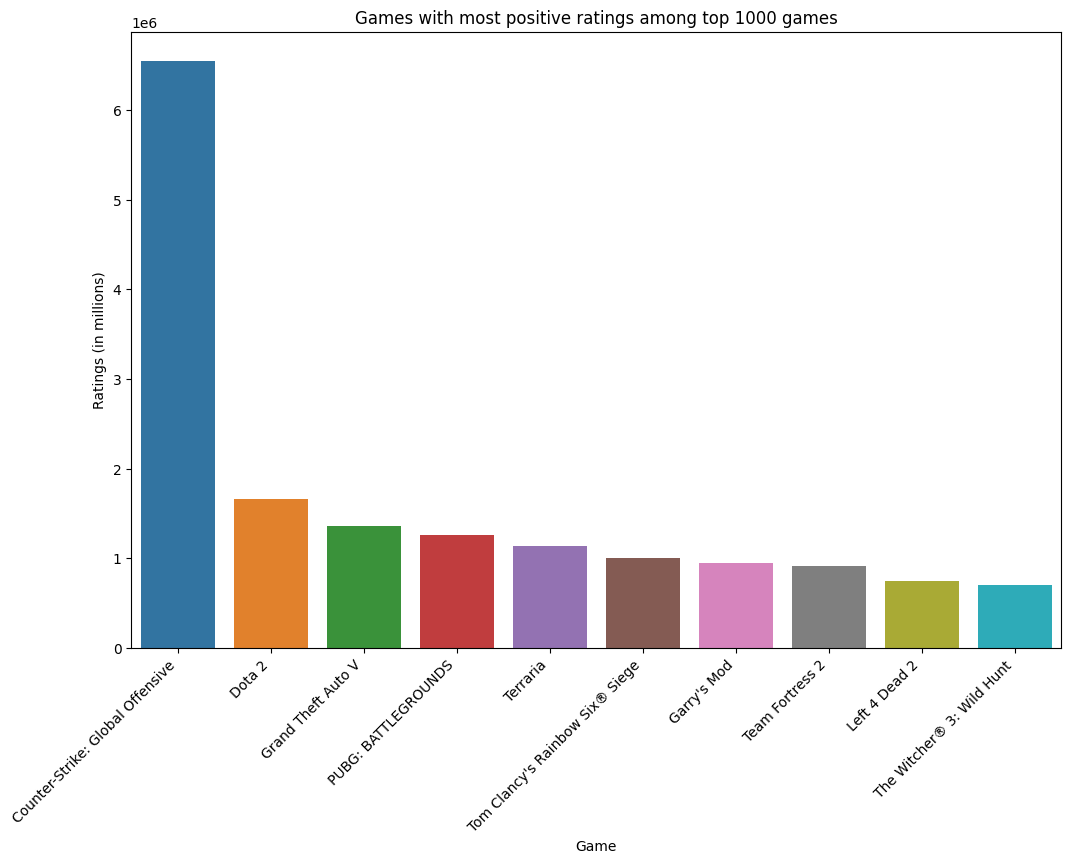

In [15]:
# Select the top 10 games with the most positive ratings from the 'steam_complete_data' DataFrame.
top_positive_rated = steam_complete_data[['name', 'positive_ratings']].sort_values(by = 'positive_ratings', ascending = False).head(10)

top_positive_rated.columns = ['Game', 'Ratings (in millions)']

plt.figure(figsize=(12,8))

# Create a bar plot to visualize the games with most positive ratings.
sns.barplot(top_positive_rated, x = 'Game', y = 'Ratings (in millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45, ha='right')

plt.title("Games with most positive ratings among top 1000 games")

# Games with most negative ratings among top 1000 games in 2023

Text(0.5, 1.0, 'Games with most negative ratings among top 1000 games')

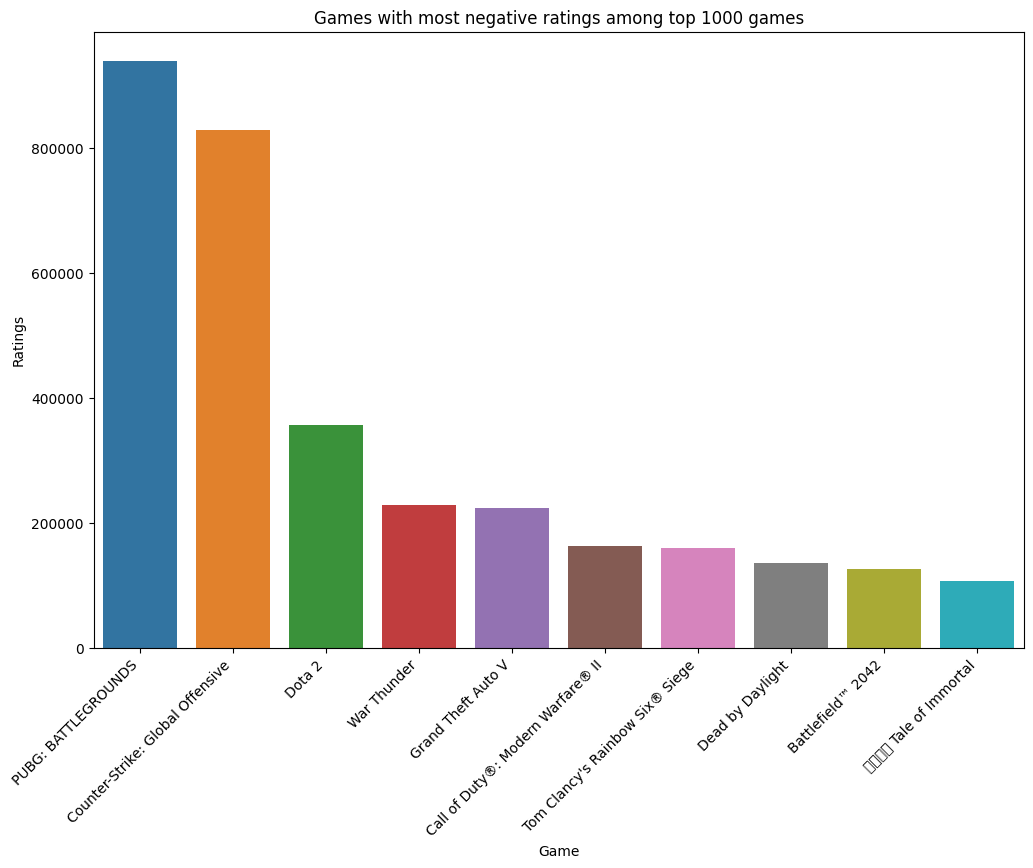

In [16]:
# Select the top 10 games with the most negative ratings from the 'steam_complete_data' DataFrame.
low_rated = steam_complete_data[['name', 'negative_ratings']].sort_values(by = 'negative_ratings', ascending = False).head(10)

low_rated.columns = ['Game', 'Ratings']

plt.figure(figsize=(12,8))

# Create a bar plot to visualize the games with most negative ratings.
sns.barplot(low_rated, x = 'Game', y = 'Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45, ha='right')

plt.title("Games with most negative ratings among top 1000 games")

# Most expensive games among top 1000 games in 2023

Text(0.5, 1.0, 'Most expensive games among top 1000 games')

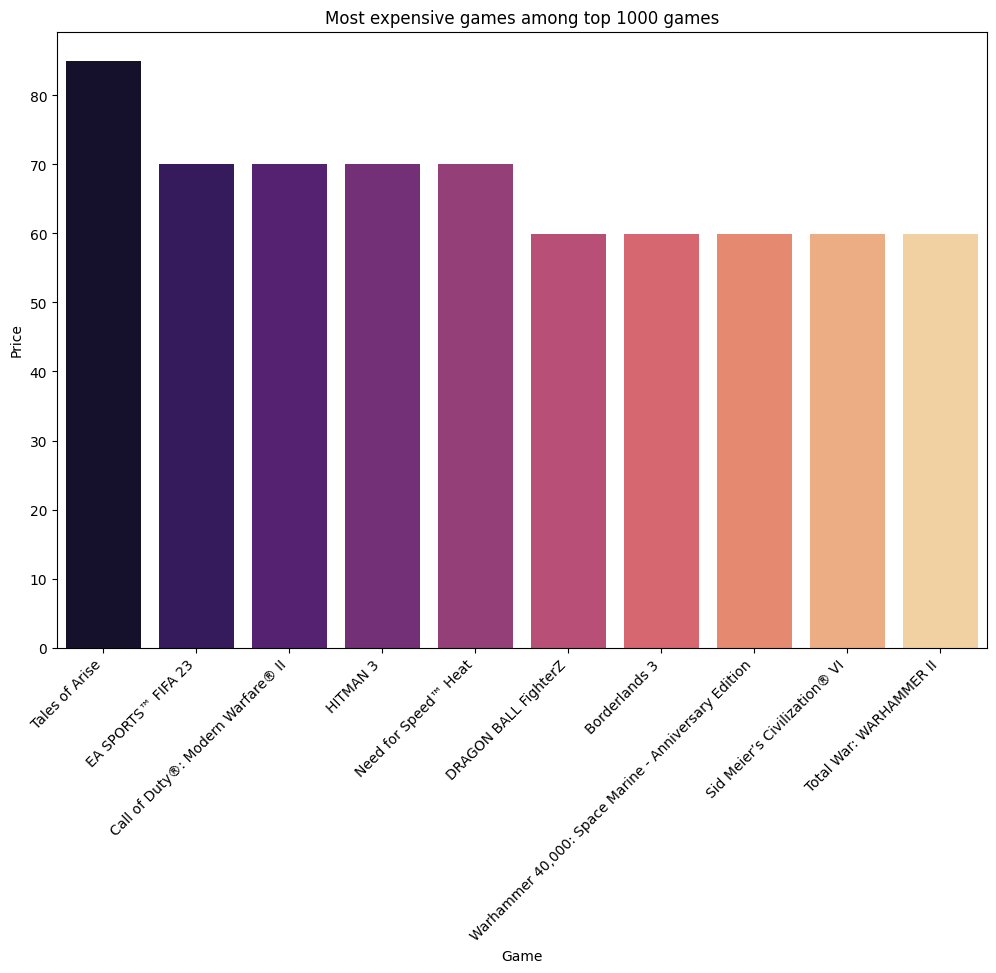

In [17]:
# Select the top 10 most expensive games from the 'steam_complete_data' DataFrame.
expensive_games = steam_complete_data[['name', 'original_price']].sort_values(by = 'original_price', ascending = False).head(10)

expensive_games.columns = ['Game', 'Price']

plt.figure(figsize=(12,8))

# Create a bar plot to visualize the most expensive games.
sns.barplot(expensive_games, x = 'Game', y = 'Price', palette='magma')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45, ha='right')

plt.title("Most expensive games among top 1000 games")

# Most discounted games among top 1000 games in 2023

Text(0.5, 1.0, 'Most discounted games among top 1000 games')

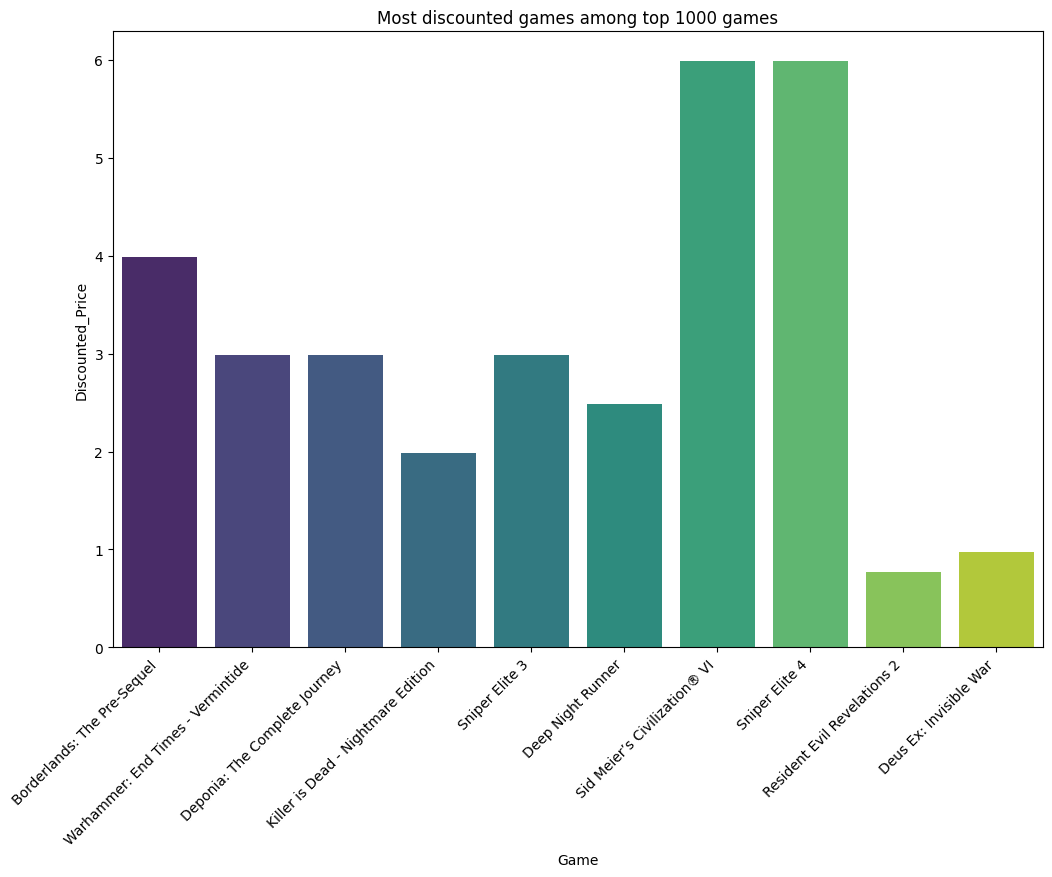

In [18]:
# Select the top 10 most discounted games from the 'steam_complete_data' DataFrame.
discounted_games = steam_complete_data[['name', 'discounted_price', 'discount_percent']].sort_values(by = 'discount_percent', ascending = False).head(10)

discounted_games.columns = ['Game', 'Discounted_Price', 'Discount_Percent']

plt.figure(figsize=(12,8))

# Create a bar plot to visualize the most discounted games.
sns.barplot(discounted_games, x = 'Game', y = 'Discounted_Price', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45, ha='right')

plt.title("Most discounted games among top 1000 games")

# Distribution of Required Age 

Text(0.5, 1.0, 'Distribution of Required Age')

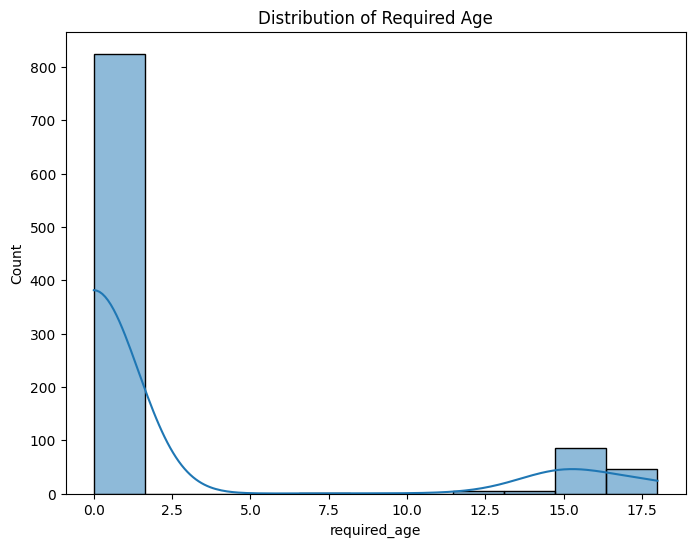

In [19]:
# Create a histogram to visualize the distribution of required age
plt.figure(figsize=(8,6))

sns.histplot(steam_complete_data, x = 'required_age', kde = True)

plt.title("Distribution of Required Age")

* **It can be observed that most of the games doesn't have age restriction.**

# Correlation

In [20]:
steam_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   steam_appid       966 non-null    int64         
 1   name              966 non-null    object        
 2   release_date      966 non-null    datetime64[ns]
 3   is_free           966 non-null    bool          
 4   languages         966 non-null    object        
 5   developer         966 non-null    object        
 6   publisher         966 non-null    object        
 7   platforms         966 non-null    object        
 8   required_age      966 non-null    int64         
 9   genre             966 non-null    object        
 10  positive_ratings  966 non-null    int64         
 11  negative_ratings  966 non-null    int64         
 12  recommendations   966 non-null    int64         
 13  concurrent_users  966 non-null    int64         
 14  owners            966 non-

In [21]:
# calculate correlation of numerical columns of 'steam_complte_data' Dataframe
correlation = steam_complete_data[['required_age', 'positive_ratings', 'negative_ratings', 
                                   'recommendations', 'concurrent_users', 'original_price', 
                                   'discount_percent', 'discounted_price']].corr()

correlation

,required_age,positive_ratings,negative_ratings,recommendations,concurrent_users,original_price,discount_percent,discounted_price
required_age,1.000000,0.021168,0.013707,0.033448,-0.015377,0.204333,0.110573,0.179122
positive_ratings,0.021168,1.000000,0.761160,0.927319,0.920377,-0.000059,-0.028113,0.009813
negative_ratings,0.013707,0.761160,1.000000,0.770576,0.809218,-0.013952,-0.020759,-0.010823
recommendations,0.033448,0.927319,0.770576,1.000000,0.791927,0.064604,-0.012857,0.071279
concurrent_users,-0.015377,0.920377,0.809218,0.791927,1.000000,-0.026284,-0.033801,-0.016559
original_price,0.204333,-0.000059,-0.013952,0.064604,-0.026284,1.000000,0.255728,0.862831
discount_percent,0.110573,-0.028113,-0.020759,-0.012857,-0.033801,0.255728,1.000000,-0.194174
discounted_price,0.179122,0.009813,-0.010823,0.071279,-0.016559,0.862831,-0.194174,1.000000


Text(0.5, 1.0, 'Correlation between numerical columns')

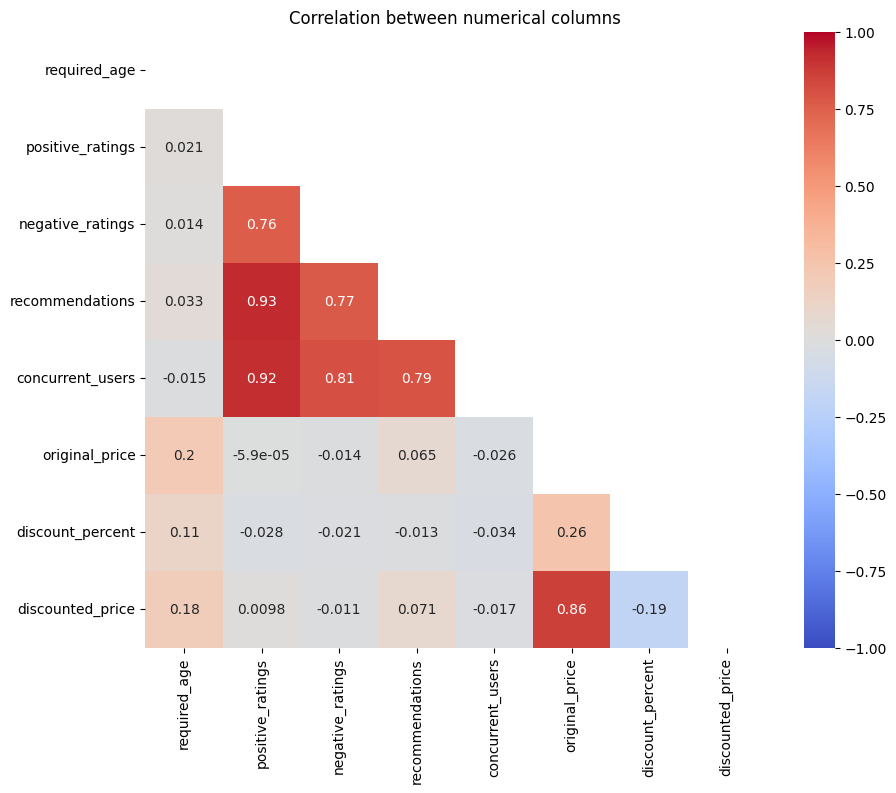

In [22]:
# create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation,dtype=bool))

plt.figure(figsize=(10,8))

# plot the correlation matrix as a heatmap
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1, mask=mask)

# set title name for heat map
plt.title('Correlation between numerical columns')

# Platform Analysis

Text(0.5, 1.0, 'Number of games available platform-wise')

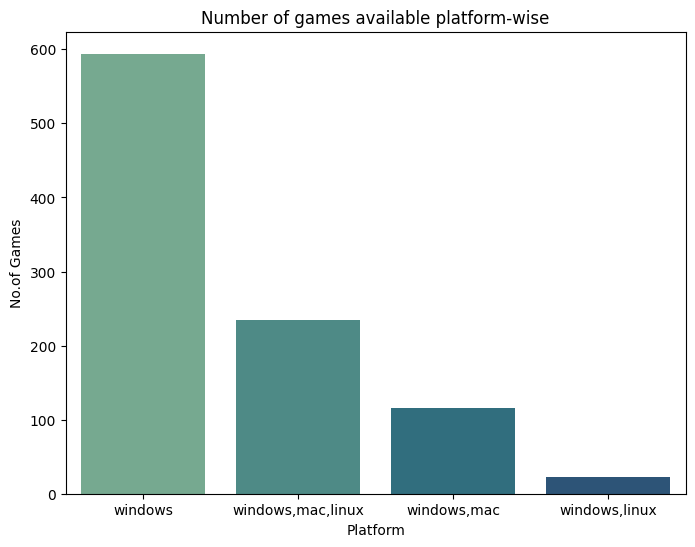

In [23]:
# count the number of games available in each platform
platforms = steam_complete_data['platforms'].value_counts().reset_index()

platforms.columns = ['Platform', 'No.of Games']

plt.figure(figsize=(8,6))

# Create a bar plot to visualize number of games available platform-wise
sns.barplot(platforms, x = 'Platform', y = 'No.of Games', palette='crest')

plt.title("Number of games available platform-wise")

Text(0.5, 1.0, 'Average positive and negative ratings based on platform')

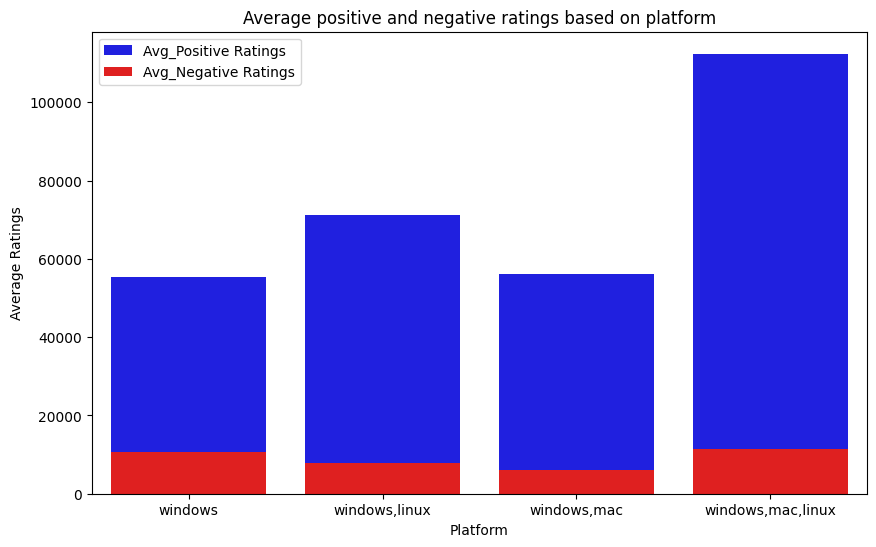

In [24]:
# calculate the average positive and negative ratings by platform
platform_ratings = steam_complete_data.groupby('platforms')[['positive_ratings', 'negative_ratings']].mean().reset_index()

# Create a bar plot to visualize average positive and negative ratings platform-wise
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_ratings, x='platforms', y='positive_ratings', color='blue', label='Avg_Positive Ratings')
sns.barplot(data=platform_ratings, x='platforms', y='negative_ratings', color='red', label='Avg_Negative Ratings')
plt.xlabel("Platform")
plt.ylabel("Average Ratings")
plt.legend()
plt.title("Average positive and negative ratings based on platform")

# Developers and Publisher Analysis

Text(0.5, 1.0, 'Developers with Most Games in Top 1000 in 2023')

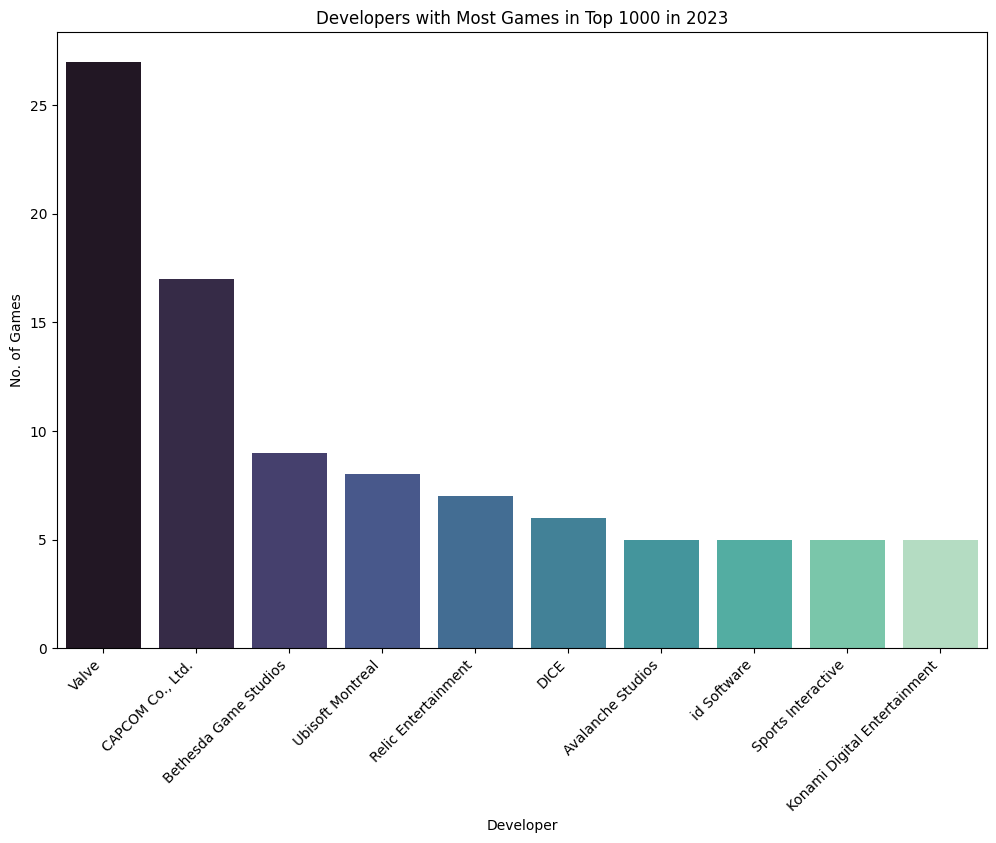

In [25]:
# Identify the top developers based on the number of games
top_developer = steam_complete_data['developer'].value_counts().reset_index().head(10)

top_developer.columns = ['Developer', 'No. of Games']

# Create a bar plot to visualize the top 10 game developers.

plt.figure(figsize=(12,8))

sns.barplot(top_developer, x = 'Developer', y = 'No. of Games', palette = 'mako')

plt.xticks(rotation = 45, ha = "right")

plt.title('Developers with Most Games in Top 1000 in 2023')

Text(0.5, 1.0, 'Publishers with Most Games in Top 1000 in 2023')

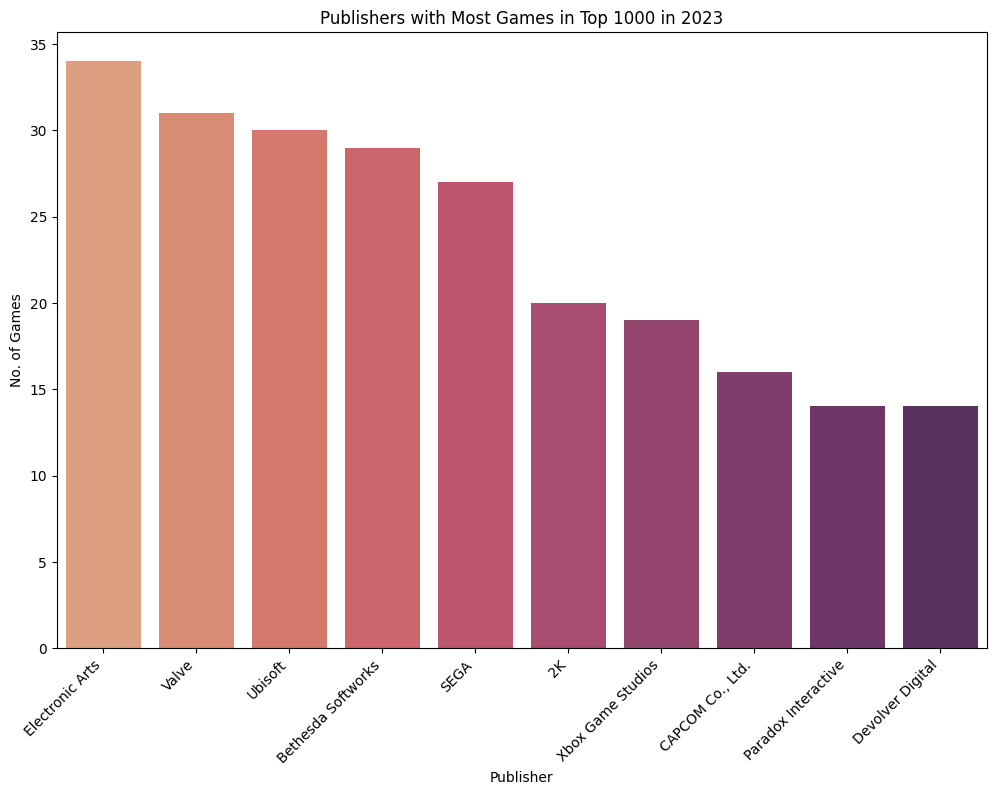

In [26]:
# Identify the top publishers based on the number of games
top_publisher = steam_complete_data['publisher'].value_counts().reset_index().head(10)

top_publisher.columns = ['Publisher', 'No. of Games']

# Create a bar plot to visualize the top 10 game publishers.

plt.figure(figsize=(12,8))

sns.barplot(top_publisher, x = 'Publisher', y = 'No. of Games', palette = 'flare')

plt.xticks(rotation = 45, ha = "right")

plt.title('Publishers with Most Games in Top 1000 in 2023')

Text(0.5, 1.0, 'Average Ratings on Games by Top Developers')

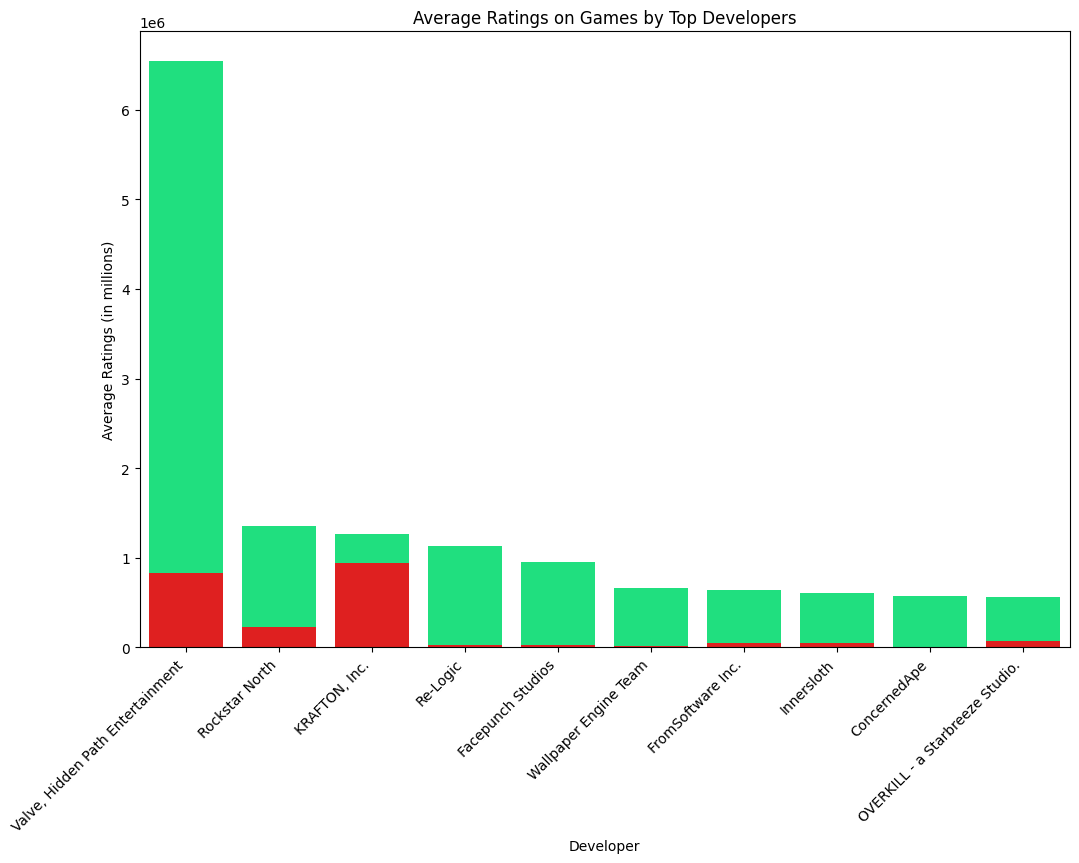

In [27]:
# calculate the average positive and negative ratings by developer
developer_pr_average = steam_complete_data.groupby('developer')[['positive_ratings', 'negative_ratings']].mean().sort_values(by = ['positive_ratings', 'negative_ratings'], ascending = False).reset_index().head(10)

developer_pr_average.columns = ['Developer', 'Avg_Postive_Ratings', 'Avg_Negative_Ratings']

# Create a bar plot to visualize average positive and negative ratings platform-wise
plt.figure(figsize=(12,8))

sns.barplot(developer_pr_average, x = 'Developer', y = 'Avg_Postive_Ratings', label = 'Avg_Positive_Ratings', color = 'springgreen')
sns.barplot(developer_pr_average, x = 'Developer', y = 'Avg_Negative_Ratings', label = 'Avg_Negative_Ratings', color = 'red')

plt.xlabel("Developer")
plt.ylabel("Average Ratings (in millions)")

plt.xticks(rotation = 45, ha = "right")

plt.title('Average Ratings on Games by Top Developers')

Text(0.5, 1.0, 'Average Ratings on Games by Publishers')

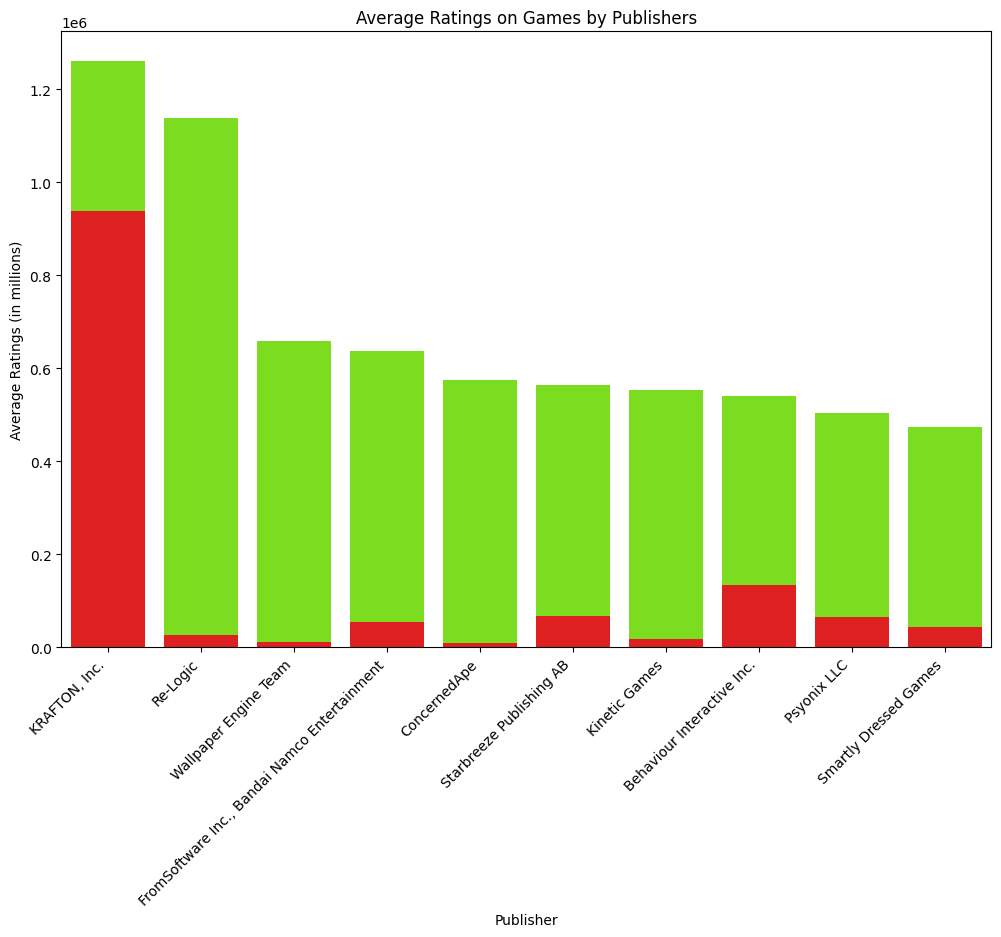

In [28]:
# calculate the average positive and negative ratings by publisher
publisher_pr_average = steam_complete_data.groupby('publisher')[['positive_ratings', 'negative_ratings']].mean().sort_values(by = ['positive_ratings', 'negative_ratings'], ascending = False).reset_index().head(10)

publisher_pr_average.columns = ['Publisher', 'Avg_Postive_Ratings', 'Avg_Negative_Ratings']

# Create a bar plot to visualize average positive and negative ratings platform-wise
plt.figure(figsize=(12,8))

sns.barplot(publisher_pr_average, x = 'Publisher', y = 'Avg_Postive_Ratings', label = 'Avg_Positive_Ratings', color = 'lawngreen')
sns.barplot(publisher_pr_average, x = 'Publisher', y = 'Avg_Negative_Ratings', label = 'Avg_Negative_Ratings', color = 'red')

plt.xlabel("Publisher")
plt.ylabel("Average Ratings (in millions)")

plt.xticks(rotation = 45, ha = "right")

plt.title('Average Ratings on Games by Publishers')

# Owners Analysis 

Text(0.5, 1.0, 'Game Owners Distribution')

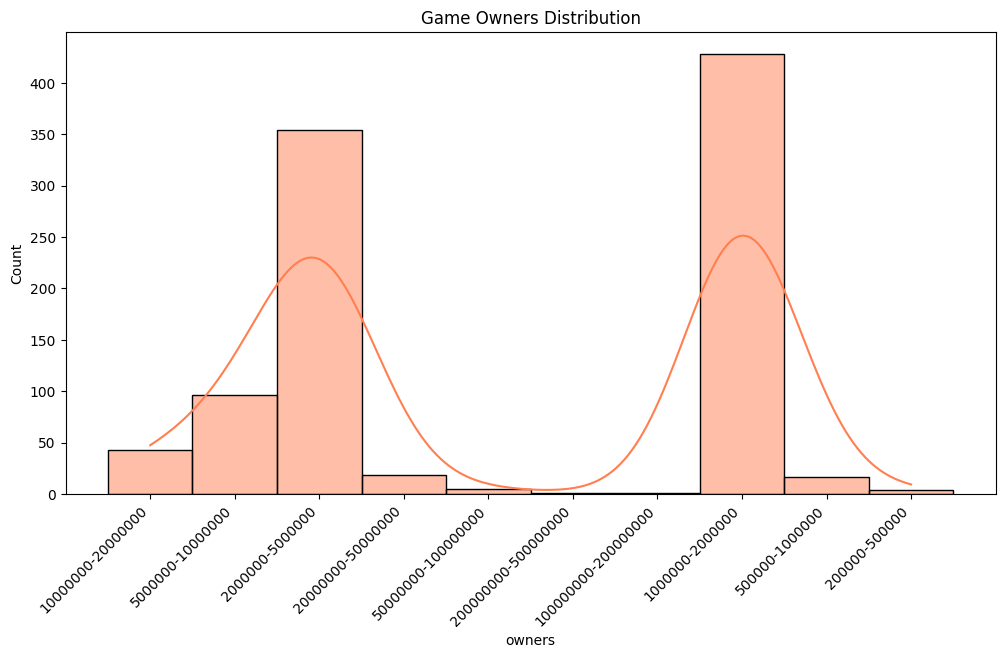

In [29]:
# Create a histogram to visualize the distribution of owners
plt.figure(figsize=(12,6))
sns.histplot(steam_complete_data, x = 'owners', kde = True, color = 'coral')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Game Owners Distribution')